In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_squared_error

In [2]:
from sklearn.datasets import load_iris
df = load_iris()

In [3]:
X=df.data
y=df.target

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [15]:
model = RandomForestClassifier(n_estimators=10)
model

RandomForestClassifier(n_estimators=10)

In [16]:
model.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [17]:
model.score(x_test,y_test)

1.0

In [18]:
ypred = model.predict(x_test)

In [19]:
cm = confusion_matrix(y_test,ypred)

<AxesSubplot:>

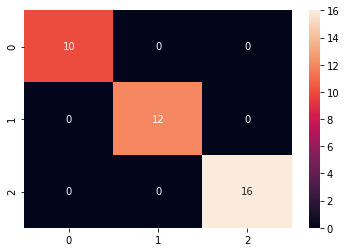

In [20]:
sns.heatmap(cm,annot=True)

In [24]:
pd.DataFrame({'y':y_test,'yhat':ypred}).value_counts()

y  yhat
2  2       16
1  1       12
0  0       10
dtype: int64

In [25]:
from sklearn.datasets import load_boston
df = load_boston()

In [26]:
X = df.data
y = df.target

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [53]:
def bestfit(trees):
    model = RandomForestRegressor(n_estimators=trees)
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    res = mean_squared_error(y_test,ypred)
    return res

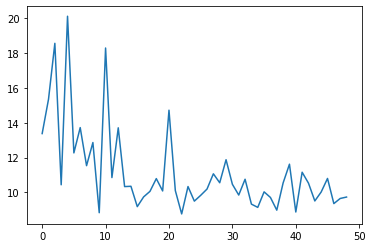

In [54]:
trees=50
err=[]
for i in range(1,trees):
    err.append(bestfit(i))
plt.plot(err)